In [1]:
import torch

In [2]:
import torchvision
from torchvision import transforms,datasets

In [3]:
train=datasets.MNIST("", train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))

In [4]:
test=datasets.MNIST("", train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

In [5]:
trainset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)

In [6]:
testset=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)


In [7]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [8]:
x,y=data

In [9]:
x

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [10]:
y

tensor([3, 4, 1, 3, 6, 8, 8, 5, 7, 6])

In [11]:
import matplotlib.pyplot as plt

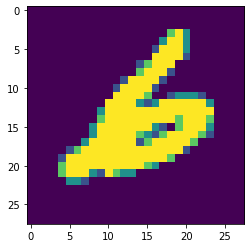

In [12]:
plt.imshow(x[9].view(28,28))

In [13]:
counter=0
counter_dict={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

In [14]:
for data in trainset:
    Xs,ys=data
    for y in ys:
        counter_dict[int(y)]+=1
        counter+=1


In [15]:
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [16]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/counter*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [17]:
import torch.nn as nn
import torch.nn.functional as F

In [18]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(28*28,64)
        self.fc2=nn.Linear(64,64)
        self.fc3=nn.Linear(64,64)
        self.fc4=nn.Linear(64,10)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)
        return F.log_softmax(x,dim=1)
net=Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [19]:
x=torch.rand(28,28)

In [20]:
x

tensor([[0.3620, 0.0098, 0.5611, 0.4721, 0.1392, 0.7064, 0.8059, 0.2738, 0.4104,
         0.3936, 0.2997, 0.9011, 0.7546, 0.6687, 0.0923, 0.8290, 0.6934, 0.7875,
         0.3536, 0.8298, 0.6627, 0.1092, 0.4630, 0.3401, 0.5437, 0.5676, 0.7327,
         0.0096],
        [0.1955, 0.9676, 0.7734, 0.1303, 0.1963, 0.7347, 0.9102, 0.0886, 0.5219,
         0.4035, 0.8070, 0.9409, 0.1755, 0.7418, 0.1255, 0.8157, 0.4155, 0.4301,
         0.6896, 0.5425, 0.0471, 0.9481, 0.9414, 0.8787, 0.8934, 0.1585, 0.3734,
         0.0587],
        [0.4752, 0.4921, 0.0144, 0.4557, 0.8686, 0.5401, 0.9935, 0.7792, 0.1073,
         0.0173, 0.7065, 0.3925, 0.2987, 0.1440, 0.2232, 0.7046, 0.5702, 0.5702,
         0.0493, 0.5043, 0.5801, 0.6980, 0.4427, 0.3476, 0.4607, 0.7330, 0.8811,
         0.0980],
        [0.7450, 0.1367, 0.6133, 0.1508, 0.6510, 0.5400, 0.0166, 0.0634, 0.1455,
         0.5914, 0.9652, 0.1787, 0.4294, 0.8656, 0.0650, 0.0028, 0.8163, 0.0583,
         0.0910, 0.0799, 0.7042, 0.1218, 0.0473, 0.1588

In [21]:
output=net(x.view(-1,28*28))

tensor([[-2.3103, -2.4142, -2.2214, -2.3513, -2.2157, -2.2245, -2.2965, -2.3830,
         -2.2388, -2.3975]], grad_fn=<LogSoftmaxBackward0>)

In [22]:
output

tensor([[-2.3103, -2.4142, -2.2214, -2.3513, -2.2157, -2.2245, -2.2965, -2.3830,
         -2.2388, -2.3975]], grad_fn=<LogSoftmaxBackward0>)